## Pseudo code réseau de neurone 

La premiere partie du TP a pour but de faire un pseudo code decrivant l etape de backpropagation d un reseau de neuronne profond lors de son apprentissage. Le reseau de neuronne a les caracteristique suivante:



- D = 100 unités d’entrée
- L couches cachées (chacune avec 100 unités)
- Un vecteur de sortie de dimension K
- Une fonction de perte donnée par :

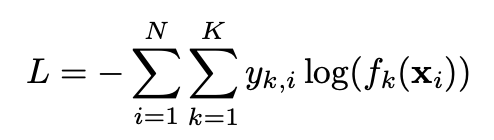

- La fonction d’activation de la couche finale:

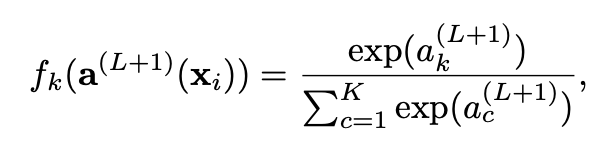

- La fonction d activation de chaque couche:

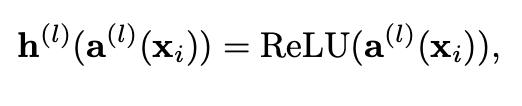

Pour effectuer l’étape de back-propagation, nous voulons trouver l’erreur de prévision du modèle par rapport à la vraie valeur connue du y des données d’entraînement. Pour y arriver, il va falloir calculer le gradient pour corriger les poids des couches du réseau de neurones. Ce calcul, avec la notation matricielle, simplifie un peu les choses, mais doit quand meme etre vu de facon claire, car il faut garder les dimensions valide. Pour calculer le gradient, il faut appliquer la dérivée de la fonction de perte en respect aux paramètres θ des couches du réseau. Le paramètre θ correspond à la concaténation de la matrice de poids W avec le vecteur de biais b. Par exemple, en effectuant la dérivée en chaîne, la dérivée de la fonction de perte en respect des paramètres θ de la couche L est :

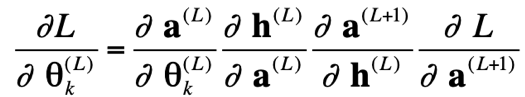

En définissant la dérivée de la fonction de perte comme l’erreur de cette couche en respect avec la fonction d’activation de la couche L + 1  : 

$$\frac{\partial \textbf{ L}}{\partial \textbf{ a}^{L+1}}= -{\nabla^{L+1}}$$

Nous sommes donc capable de défénir récusivement l’erreur de chaque couche grace à l’erreur de la couche supérieure :

$$\nabla^{L} = {\frac{\partial \textbf{ h}^{(L)}}{\partial \textbf{ a}^{(L)}}} {\frac{\partial \textbf{ a}^{(L+1)}}{\partial \textbf{ h}^{(L)}}}\nabla^{L+1}$$

Donc, grace à l'équation suivante, nous pouvons calculé la dérivée de la fonction de perte en fonctions des paramètre pour n'importe quelle couche du réseau de neurone

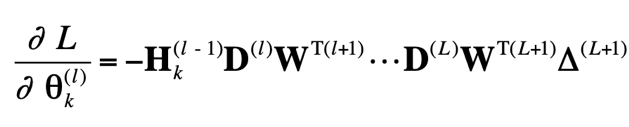

Où, D et W correspondent aux dérivées respectives suivantes :

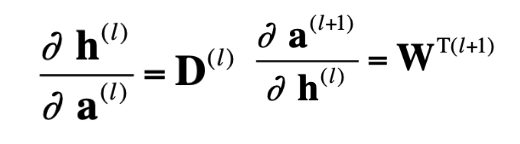

H est la matrice qui contient, pour les couches caché (h) dans la colonne k,les fonctions d'activations. C'est alors qu'il est obligatoire de calculer L+1.Ceci doit etre fait en calculant la dérivé de la fonction de perte selon la fonction de préactivation, pour définir l'algorithme de back-propagation.

Dérivé de la fonction de perte (SoftMax):

Le pseudocode décrivant l’étape de back-propagation est le suivant :

## Implementation Réseau de neurone avec Numpy:

Écris avec l'aide des sources suivantes, car difficulté à implémenter sans squelette (avait commencer avant l'envoie du squelette) :

https://medium.com/@a.mirzaei69/implement-a-neural-network-from-scratch-with-python-numpy-backpropagation-e82b70caa9bb

http://www.adeveloperdiary.com/data-science/deep-learning/neural-network-with-softmax-in-python/?fbclid=IwAR3T6k8fZ7t6Ww_EQYdztAxHD8V4HHtLt0SMdWbAcxLFphD4tdkHbmKFkww

https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

https://towardsdatascience.com/building-an-artificial-neural-network-using-pure-numpy-3fe21acc5815

https://www.kdnuggets.com/2019/08/numpy-neural-networks-computational-graphs.html

https://medium.com/analytics-vidhya/deep-neural-networks-step-by-step-with-numpy-library-565836a867db

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = fashion_mnist.load_data()

# Preparation des données
Y_train_reshaped = Y_train_origin.reshape(60000, 1)
Y_test_reshaped = Y_test_origin.reshape(10000, 1)
Y_train_T = to_categorical(Y_train_reshaped, num_classes=10)
Y_test_T = to_categorical(Y_test_reshaped, num_classes=10)
Y_train = Y_train_T.T
Y_test = Y_test_T.T


# Mettre à plate les données d'entré c'est a dire rendre la matrice 28x28 dans un vecteur de 784 
X_train_flat = X_train_origin.reshape(X_train_origin.shape[0], -1).T
X_test_flat = X_test_origin.reshape(X_test_origin.shape[0], -1).T

# Normalisation des pixel pour que leur valeur soit entre 0 et 1
X_train = X_train_flat / 255.
X_test = X_test_flat / 255.



# Fonction d'activation
def relu(p):
    return np.maximum(0, p)

# Fonction d'activation de la derniere couche
def softmax(u):
    return np.exp(u) / np.sum(np.exp(u), axis=0, keepdims=True)

# Initialiser le Biais et les poids
parameters = {}
def format_parameters(layer_dimensions):
    L = len(layer_dimensions)
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dimensions[l], layer_dimensions[l - 1]) * (np.sqrt(2 / layer_dimensions[l - 1]))
        parameters["b" + str(l)] = np.zeros((layer_dimensions[l], 1))
    return parameters

# Forward Propagation
outputs = {}
activation = {}
def forward_propagation(parameters, X_train, activation):
    m = X_train.shape[1]
    outputs["Z" + str(1)] = np.dot(parameters["W1"], X_train) + parameters["b1"]
    activation["A" + str(1)] = relu(outputs["Z" + str(1)])
    for l in range(2, 4):
        outputs["Z" + str(l)] = np.dot(parameters["W" + str(l)], activation["A" + str(l - 1)]) + parameters["b" + str(l)]
        activation["A" + str(l)] = relu(outputs["Z" + str(l)])
    outputs["Z4"] = np.dot(parameters["W4"], activation["A3"]) + parameters["b4"]
    activation["A4"] = softmax(outputs["Z4"])
    return outputs, activation
#forward_prop(parameters, X_train, activation)

# Calcul du Cost
def cost_function(activation):
    loss = - np.sum((Y_train * np.log(activation["A4"])), axis=0, keepdims=True)
    cost = np.sum(loss, axis=1) / m
    return cost


# Backward Propagation avec la descente du gradient
def derivative_relu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x
gradient_reg = {}

m = X_train.shape[1]

def grad_backprob(parameters, outputs, activation):
    gradient_reg["dZ4"] = (activation["A4"] - Y_train) / m
    for l in range(1, 4):
        gradient_reg["dA" + str(4 - l)] = np.dot(parameters["W" + str(4 - l + 1)].T, gradient_reg["dZ" + str(4 - l + 1)])
        gradient_reg["dZ" + str(4 - l)] = gradient_reg["dA" + str(4 - l)] * derivative_relu(outputs["Z" + str(4 - l)])
    gradient_reg["dW1"] = np.dot(gradient_reg["dZ1"], X_train.T)
    gradient_reg["db1"] = np.sum(gradient_reg["dZ1"], axis=1, keepdims=True)
    for l in range(2, 5):
        gradient_reg["dW" + str(l)] = np.dot(gradient_reg["dZ" + str(l)], activation["A" + str(l - 1)].T)
        gradient_reg["db" + str(l)] = np.sum(gradient_reg["dZ" + str(l)], axis=1, keepdims=True)
    return parameters, outputs, activation, gradient_reg
#grad_re(parameters, outputs, activation)
def learning(gradient_reg, learning_rate=0.001):
    for i in range(1, 5):
        parameters["W" + str(i)] = parameters["W" + str(i)] - (learning_rate * gradient_reg["dW" + str(i)])
        parameters["b" + str(i)] = parameters["b" + str(i)] - (learning_rate * gradient_reg["db" + str(i)])
    return parameters
#learning(parameters, grad_reg, learning_rate=0.005)

# Prédiction
def prediction_on_test(parameters, X_test):
    forward_propagation(parameters, X_test, activation)
    predictions = np.round(activation["A4"])
    return predictions


# Itereré 
number_iterations = 1000
print_cost = True
costs = []

# Gradient D escent over number of iterations
def gradient_descent(number_iterations, costs, activation):
    format_parameters([X_train.shape[0], 50, 50, 50, 10])
    for l in range(0, number_iterations):
        forward_propagation(parameters, X_train, activation)
        cost = cost_function(activation)
        grad_backprob(parameters, outputs, activation)
        learning(gradient_reg, learning_rate=0.001)
        if l % 100 == 0:
            costs.append(cost)
        if print_cost and l % 100 == 0:
            print("Cost apres l'iteration %i: %f" % (l, cost))
    return costs, parameters

gradient_descent(number_iterations, costs, activation)
predictions = prediction_on_test(parameters, X_test)
print(predictions)

# Graphique number_iterations vs Cost
plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Cost apres l'iteration 0: 2.508178
Cost apres l'iteration 100: 2.146356
Cost apres l'iteration 200: 1.963761
Cost apres l'iteration 300: 1.800805
Cost apres l'iteration 400: 1.663163
Cost apres l'iteration 500: 1.544940
Cost apres l'iteration 600: 1.443868
Cost apres l'iteration 700: 1.357207
Cost apres l'iteration 800: 1.282313


In [ ]:
def logloss(true_label, predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps)
    if true_label == 1:
        return -np.log(p)
    else:
        return -np.log(1 - p)



In [ ]:
from sklearn.metrics import log_loss



print(predictions[5])
print(len(predictions))

print("allo")
print(Y_test[5])
print(len(Y_test[5]))
array_good_prediction = []
good_prediction = 0
loglossbitch= 0
array_logloss= []
total = 0
for epoch in range(len(predictions)):
    for prediction in range (len(predictions[epoch])):
        if predictions[epoch][prediction] == Y_test[epoch][prediction]:
            good_prediction = good_prediction +1 
        total = total + 1
        loglossbitch = loglossbitch+logloss(Y_test[epoch][prediction],predictions[epoch][prediction])
    print("Pour l'epoch ",epoch+1,": Accuracy : ",good_prediction/10000*100,"%, LOGLOSS: ",loglossbitch/10000)
    array_good_prediction.append(good_prediction/number_iterations*100)
    array_logloss.append(loglossbitch/number_iterations)
    
    total = 0 
    good_prediction= 0
    loglossbitch= 0
    print(log_loss(Y_test[epoch], predictions[epoch], eps=1e-15))
    
    
        

    

In [ ]:
print(array_logloss)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(array_logloss, 'b', label="Training Steps")
ax1.set_title('Courbes d\'apprentissage')
ax1.set_ylabel('Log négatif de vraisemblance moyenne')
ax1.set_xlabel('Epoch')
plt.show()

print(array_good_prediction)
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.plot(array_good_prediction, 'b', label="Precision")
ax1.set_title('Courbes d\'apprentissage')
ax1.set_ylabel('Precision')
ax1.set_xlabel('Epoch')
plt.show()

## Comparaison entre mon implémentation Numpy et la librairie PyTorch

En utilisant la log vraisemblance et la precision du modéle nous pouvons facilement comparer les 2 modeles. Le modele ecris seulement en Numpy donne les resultats suivant :


|   Epoch   |    Accuracy    |          
|-----------|----------------|
|    1      |   90%|
|    2      |   90%|
|    3      |   89,89%|
|    4      |   90%|
|    5      |   89.96%|
|    6      |   90%|
|    7      |   90%|
|    8      |   94,56%|
|    9      |   93.57%|
|    10     |   92.58%|

|   Epoch   |    Log_Loss    |
|-----------|----------------|
|    1      |  3.45 |
|    2      |  3.45 |
|    3      |  3.46 |
|    4      |  3.45 |
|    5      |  3.46 |
|    6      |   3.45|
|    7      |  3.45 |
|    8      |   3.45|
|    9      |   1.87|
|    10     |   2.22|

In [ ]:
Pour le meilleur réseau créer à la partie 2:

|   Epoch   |    Accuracy    |          
|-----------|----------------|
|    1      |   |
|    2      |   |
|    3      |   |
|    4      |   |
|    5      |   |
|    6      |   |
|    7      |   |
|    8      |   |
|    9      |   |
|    10     |   |

|   Epoch   |    Log_Loss    |
|-----------|----------------|
|    1      |   |
|    2      |   |
|    3      |   |
|    4      |   |
|    5      |   |
|    6      |   |
|    7      |   |
|    8      |   |
|    9      |   |
|    10     |   |

Les graphiques pour ces 2 modèles sont disponible dans leur section respective. De plus, le modele impl/menter avec Numpy ne se comporte pas comme prevu, car on dirait que l epoch 2 

# Partie 2 

Code source basé sur le code du tutoriel suivant : https: //github.com/AlexPiche/INF8225/tree/master/tp2

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
from torch.autograd import Variable
import torchvision.transforms as transforms
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

use_cuda = True

train_data = torchvision.datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))

validation_data = torchvision.datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]))

test_data = torchvision.datasets.FashionMNIST('../data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]))

train_data.train_data[0].size()

Using downloaded and verified file: ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


EOFError: Compressed file ended before the end-of-stream marker was reached

In [3]:
batch_size = 100
test_batch_size = 100

train_loader = torch.utils.data.DataLoader(train_data,
    batch_size=batch_size, shuffle=True)

valid_loader = torch.utils.data.DataLoader(validation_data,
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data,
    batch_size=batch_size, shuffle=True)

NameError: name 'train_data' is not defined

## Réseau fully connected

In [4]:
class FullyConnectedNet(nn.Module):
    def __init__(self):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        sizeValue = x.size()[0]
        x = x.view(sizeValue, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Réseau de convolution

In [ ]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 50, 5)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

 Évaluation des modèles : Entrainement et validation. Le meilleur modèle est choisi pour l'évaluation sur le jeux de test. 

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    totalLoss = 0;
    for batch_idx, (data, target) in enumerate(train_loader):
        if use_cuda and torch.cuda.is_available():
          data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() 
        else:
          data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)  # calls the forward function
        loss = F.nll_loss(output, target, size_average=False)
        totalLoss += loss.data.item()
        loss.backward()
        optimizer.step()
    totalLoss = totalLoss/len(train_loader.dataset)
    return model, totalLoss
  
def valid(model, valid_loader):
    model.eval()
    valid_loss = 0
    correct = 0
    for data, target in valid_loader:
        if use_cuda and torch.cuda.is_available():
          data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        else:
          data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        valid_loss += F.nll_loss(output, target, size_average=False).data.item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    valid_loss /= len(valid_loader.dataset)
    print('\n' + "valid" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        valid_loss, correct, len(valid_loader.dataset),
        100. * correct / len(valid_loader.dataset)))
    return correct.item() / len(valid_loader.dataset), valid_loss

    
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if use_cuda and torch.cuda.is_available():
          data, target = Variable(data, volatile=True).cuda(), Variable(target).cuda() # if you have access to a gpu
        else:
          data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data.item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\n' + "test" + ' set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
def experiment(model, epochs=10, lr=0.001):
    best_precision = 0
    best_model = model
    trainLosses = []
    validationLosses = []
    precisionHistory = []
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(1, epochs + 1):
        model, trainLoss = train(model, train_loader, optimizer)
        trainLosses.append(trainLoss)
        precision, validationLoss = valid(model, valid_loader)
        precisionHistory.append(precision)
        validationLosses.append(validationLoss)
        if precision > best_precision:
            best_precision = precision
            best_model = model
    
    #Plot the loss for the training and validation process
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(trainLosses, 'b', label="Training Steps")
    ax1.plot(validationLosses, 'm', label="Validation Steps")
    ax1.set_title('Courbes d\'apprentissage')
    ax1.set_ylabel('Log négatif de vraisemblance moyenne')
    ax1.set_xlabel('Epoch')
    plt.show()
    
    fig2 = plt.figure()
    ax1 = fig2.add_subplot(111)
    ax1.plot(precisionHistory, 'b', label="Precision")
    ax1.set_title('Courbes d\'apprentissage')
    ax1.set_ylabel('Precision')
    ax1.set_xlabel('Epoch')
    plt.show()
    
    
    
    return best_model, best_precision

In [ ]:
best_precision = 0
best_model = None
for model in [FullyConnectedNet(), ConvolutionalNet()]:  # add your models in the list
    print(type(model))
    if use_cuda and torch.cuda.is_available():
      model.cuda()
    model, precision = experiment(model)
    if precision > best_precision:
        best_precision = precision
        best_model = model

print("Modele choisi :")
print(type(best_model))
test(best_model, test_loader)